# HW3_programQuestion

**Due to 11:59 pm, 28th, October 2020**

**This is an individual assignment.**

In [61]:
"""
Import libraries that you might require.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression

## Logistic Regression and Gradient Descent

In this question, we will try to use logistic regression to solve a binary classification problem. Given some information of the house, such as area and the number of living rooms, would it be expensive? We would like to predict 1 if it is expensive, and 0 otherwise. 

We will first implement it with a python package, and then try to implement it by updating weights with gradient descent.Batch gradient descent (since we are using all samples at each iteration) and AdaGrad will be implemented. We will also derive the gradient formula.

### a) Implement logistic regression with Scikit learn package. 

First load data and observe data.

In [62]:
"""
Reads the data.
"""

X_train = pd.read_csv('hw3_house_sales/X_train.csv')
X_test = pd.read_csv('hw3_house_sales/X_test.csv')
y_train = pd.read_csv('hw3_house_sales/y_train.csv')
y_test = pd.read_csv('hw3_house_sales/y_test.csv')

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(X_test.head(5))
print(y_test.head(5))

(800, 11)
(400, 11)
(800, 1)
(400, 1)
   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  GrLivArea  \
0    11851            7            5       1990          1990       1442   
1     9920            7            5       1996          1997       2013   
2    11216            8            5       2006          2006       1489   
3     8244            7            5       2004          2004       1720   
4    11787            7            5       1996          1997       2398   

   FullBath  BedroomAbvGr  KitchenAbvGr  YrSold  const  
0         2             3             1    2009      1  
1         2             3             1    2007      1  
2         2             3             1    2006      1  
3         2             3             1    2007      1  
4         2             3             1    2007      1  
   label
0      1
1      1
2      1
3      1
4      1


Fill in the logisticRegressionScikit() function. Report the weights, training accuracy, and the test accuracy.

In [63]:
def LogisticRegressionScikit(X_train, y_train, X_test, y_test):
    """
    Computes logistic regression with scikit-learn.
    
    Args:
        X_train: feature matrix of training set
        y_train: truth value of training set
        X_test: feature matrix of test set
        y_test: truth value of test set

    Returns:  
        w: numpy array of learned coefficients
        y_pred: numpy array of predicted labels for the test data
        score: accuracy of test data
    """
    model = LogisticRegression(solver='liblinear')

    # 拟合
    model.fit(X_train, y_train)

    # 预测测试集
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    coef = model.coef_
    return coef, y_pred, score


In [64]:

coef_scikit, y_pred_scikit, acc_scikit = LogisticRegressionScikit(X_train, y_train, X_test, y_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(acc_scikit))
print('logistic regression coefficient:', coef_scikit)

Accuracy of logistic regression classifier on test set: 0.95
logistic regression coefficient: [[ 3.23848351e-04  1.91289198e+00  9.54139878e-01  7.16158384e-02
  -3.58688700e-04  6.67247519e-03  6.04274097e-01 -9.44441219e-01
  -6.63058663e-01 -8.37888209e-02 -3.83809397e-04]]


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### b) Gradient derivation
Calculate the maximum likelihood estimation $L(w)=P(Y|X;w)$, then formulate the stochastic gradient ascent rule.

### c) Logistic regression with simple gradient descent
Fill in the LogisticRegressionSGD() function. To do that, two helper functions, sigmoid_activation() (to calculate the sigmoid function result), and model_optimize() (to calculate the gradient of w), will be needed. Both helper functions can be used in the following AdaGrad optimization function. Use a learning rate of $10^{−4}$, run with 2000 iterations. Report the weights and accuracy. Keep track of the accuracy every 100 iterations in the training set. It will be used later.

In [65]:
def sigmoid_activation(x):
    """
    Calculates the sigmoid function.
    
    Args:
        x: numpy array of input
        
    Returns:
        final_result: numpy array of sigmoid result
    """
    final_result = 1.0/(1 + np.exp(-x))
    return final_result

**Remember to derive the gradient (Question 4.2), write down the weight update formula, and hand it in with your latex submission!**

In [66]:
def model_optimize(w, X, Y):
    """
    Calculates gradient of the weights.
    
    Args:
        X: numpy array of training samples
        Y: numpy array of training labels
        w: numpy array of weights
    Returns:
        dw: the gradient of the weights

    """
    h = sigmoid_activation(np.dot(X, w.T))  # sigmoid函数已定义
    E = (h - Y)
    # 10个梯度为一批次的随机梯度
    dw = 0
    for i in range(10):
        random_n = np.random.randint(0, Y.size)
        dw += E[random_n]*X[random_n]
    dw /= 10
    return dw

In [67]:
def LogisticRegressionSGD(w, X, Y, learning_rate, num_iterations):
    """
    Uses SGD to update weights for logistic regression.
    
    Args:       
        w: numpy array of initial weights
        X: numpy array of training samples
        Y: numpy array of training labels
        learning_rate: float learning rate to update w
        num_iterations: int number of iterations to update w
    
    Returns:  
        coeff: numpy array of weights after optimization
        accuracies: a list of accuracy at each hundred's iteration. With 2000 iterations, 
                    accuracies should be a list of size 20 
    """
    accuracies = []
    m = len(Y)
    for i in range(1, num_iterations + 1):
        dw = model_optimize(w, X, Y)
        w -= learning_rate * dw
        if i % 100 == 0:
            y_pred = predict(sigmoid_activation(np.dot(X, w.T)), m)
            accuracies.append(accuracy_score(Y, y_pred))
            
    coeff = w

    
    return coeff, accuracies

### d) Logistic regression with AdaGrad
 Fill in the LogisticRegressionAda() function. Use a learning rate of $10^{−4}$, run with 2000 iterations. Report the weights and accuracy. Keep track of the accuracy every 100 iterations in the training set. It will be used later.

In [68]:
def LogisticRegressionAda(w, X, Y, learning_rate, num_iterations):
    """
    Use AdaGrad to update weights.
    
    Args:       
        w: numpy array of initial weights
        X: numpy array of training samples
        Y: numpy array of training labels
        learning_rate: float learning rate to update w
        num_iterations: int number of iterations to update w
    
    Returns:   
        coeff: numpy array of weights after optimization
        accuracies: a list of accuracy at each hundred's iteration
    """
    accuracies = []
    h = 0
    m = len(Y)
    for i in range(1, num_iterations + 1):
        dw = model_optimize(w, X, Y)
        h = h + np.dot(dw, dw.T)
        w = w - learning_rate/np.sqrt(h)*dw

        if i % 100 == 0:
            y_pred = predict(sigmoid_activation(np.dot(X, w.T)), m)
            accuracies.append(accuracy_score(Y, y_pred))
    
        coeff = w
        
    return coeff, accuracies

We add a predict() function here to threshold probability prediction into binary classification

In [69]:
def predict(final_pred, m):
    """
    Predict labels from probability to 0/1 label, threshold 0.5.
    
    Args:
        final_pred: m x 1 vector, probabilty of each sample belonging to class 1
        m: number of samples
        
    Returns:
        y_pred: m x 1 vector, label of each sample, can be 0/1
    """
    y_pred = []
    for i in range(m):
        if final_pred[i] > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

Now we start to use our dataset and construct model.

In [70]:

# Do some data preparation, convert dataframe to numpy array
n_features = X_train.shape[1]

w = np.zeros((1, n_features))

X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

m_train =  X_train.shape[0]
m_test =  X_test.shape[0]


Model construction for SGD logistic regression.

In [72]:

#Gradient Descent
coeff_SGD, acc_SGD = LogisticRegressionSGD(w, X_train, y_train, learning_rate=0.0001,num_iterations=2000)

# TODO: predict probability
final_train_pred_SGD = sigmoid_activation(X_train @ coeff_SGD.T)
final_test_pred_SGD = sigmoid_activation(X_test @ coeff_SGD.T)
# predict label
y_train_pred_SGD = predict(final_train_pred_SGD, m_train)
y_test_pred_SGD = predict(final_test_pred_SGD, m_test)

print('Optimized weights for SGD', coeff_SGD[:-1])
print('Optimized intercept for SGD', coeff_SGD[-1])

print('Training Accuracy for SGD', accuracy_score(y_train_pred_SGD, y_train))
print('Test Accuracy for SGD', accuracy_score(y_test_pred_SGD, y_test))

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


Optimized weights for SGD []
Optimized intercept for SGD [-1.57991706e-01  9.81846946e-02 -1.93377917e-02 -2.93686691e-01
 -1.49795366e+00  4.82198211e+00  2.61145122e-02 -3.28812953e-02
 -1.36578969e-02 -3.04407611e+00 -1.51637496e-03]
Training Accuracy for SGD 0.55
Test Accuracy for SGD 0.5625


Model construction for AdaGrad logistic regression.

In [74]:

#AdaGrad Descent
coeff_Ada, acc_Ada = LogisticRegressionSGD(w, X_train, y_train, learning_rate=0.0001,num_iterations=2000)

# TODO: predict probability
final_train_pred_Ada = sigmoid_activation(X_train @ coeff_Ada.T)
final_test_pred_Ada = sigmoid_activation(X_test @ coeff_Ada.T)
# predict label
y_train_pred_Ada = predict(final_train_pred_Ada, m_train)
y_test_pred_Ada = predict(final_test_pred_Ada, m_test)

print('Optimized weights for Ada', coeff_Ada[:-1])
print('Optimized intercept for Ada', coeff_Ada[-1])

print('Training Accuracy for Ada', accuracy_score(y_train_pred_Ada, y_train))
print('Test Accuracy for Ada', accuracy_score(y_test_pred_Ada, y_test))

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


Optimized weights for Ada []
Optimized intercept for Ada [ 1.13258177e-01  1.87268312e-01 -3.22135458e-02  1.05399380e+00
 -1.35291181e+00  4.77501857e+00  4.85751870e-02 -6.59059323e-02
 -2.70198306e-02 -4.24480809e+00 -2.11441016e-03]
Training Accuracy for Ada 0.77625
Test Accuracy for Ada 0.7725


Plot accuracy vs iteration for SGD and AdaGrad. Compare the performance difference. Briefly explain the reason.

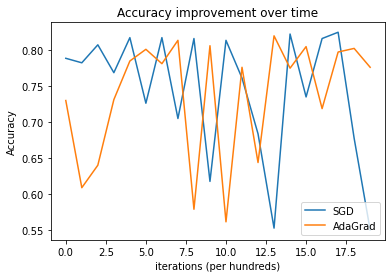

In [75]:

# Plot accuracy vs iteration for SGD and AdaGrad

plt.plot(acc_SGD, label='SGD')
plt.plot(acc_Ada, label='AdaGrad')
plt.ylabel('Accuracy')
plt.xlabel('iterations (per hundreds)')
plt.title('Accuracy improvement over time')
plt.legend(loc='lower right')
plt.show()

### e) Comparision of Scikit, SGD and AdaGrad convergence
Plot the loss function of SGD and AdaGrad over 2000 iterations on both the training and test data. What do you observe? Which one has better accuracy on the test dataset? Why might that be the case?

# 从总体准确率曲线看，随机梯度下降算法较好(因为采用的是小批次随机梯度算法)
# 都没有sklearn库的准确率高，通用是有原因的..
